<a href="https://colab.research.google.com/github/karthika-shankar/bank_churnanalysis_tcs/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [7]:
df=pd.read_csv('with_sentiment.csv')
df.describe()
df

,CustomerID,Name,Age,Gender,Geography,Native_Place,Marital_Status,Tenure,Account_Type,Balance,...,Loan_Status,EMI_Amount,Exited,Branch_Code,Account_Open_Date,Last_Transaction_Date,Customer_Review,Emoji_Sentiment,Text_Sentiment,Combined_Sentiment
0,CID000001,Sunita Sharma,21,Other,Tamil Nadu,Hyderabad,Married,4,Current,676699.49,...,Auto,4238.57,0,BR072,2024-03-10,2024-06-23,Reasonable fees 💲,0.0,0.0000,0.00000
1,CID000002,Amit Kumar,53,Male,Karnataka,Pune,Divorced,8,Premium,215313.76,...,Business,30226.31,0,BR094,2020-02-26,2024-08-20,Professional staff 🌟,1.0,0.0000,0.60000
2,CID000003,Rohan Gupta,55,Other,West Bengal,Lucknow,Married,2,Savings,661263.32,...,Education,43308.58,0,BR021,2024-04-07,2024-11-21,Great mobile app 🥰,1.0,0.9081,0.96324
3,CID000004,Sunita Iyer,27,Other,Karnataka,Jaipur,Married,5,NRI,379455.44,...,Business,19905.26,0,BR028,2022-02-15,2024-12-11,Professional staff 🌟,1.0,0.0000,0.60000
4,CID000005,Priya Iyer,76,Male,Tamil Nadu,Bangalore,Married,17,Senior Citizen,747013.81,...,Multiple,27711.22,0,BR015,2021-11-16,2024-07-04,Professional staff 🌟,1.0,0.0000,0.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CID099996,Rohan Gupta,44,Male,Telangana,Chennai,Widowed,14,Joint,678326.81,...,Gold,0.00,0,BR081,2025-03-12,2024-08-31,Great mobile app 🥰,1.0,0.9081,0.96324
99996,CID099997,Amit Singh,62,Male,West Bengal,Bangalore,Widowed,13,Current,836294.17,...,Auto,9337.87,0,BR086,2016-03-02,2024-11-04,Excellent service! 😊,1.0,0.8748,0.94992
99997,CID099998,Sunita Rao,59,Female,Karnataka,Lucknow,Divorced,3,NRI,537264.63,...,Gold,10962.54,0,BR062,2023-04-21,2024-10-17,Great mobile app 🥰,1.0,0.9081,0.96324
99998,CID099999,Neha Gupta,50,Male,Telangana,Pune,Divorced,4,Salary,386295.37,...,Multiple,83598.98,0,BR019,2022-08-07,2024-12-06,No waiting time ⚡,1.0,-0.2960,0.48160


In [9]:
df.drop(['CustomerID', 'Name','Emoji_Sentiment', 'Text_Sentiment','Branch_Code','Account_Open_Date', 'Last_Transaction_Date','Customer_Review'],axis=1,inplace=True)

In [10]:
numerical_columns=list(df.select_dtypes(include=['int64','float64']))
categorical_columns=df.select_dtypes(include=['object'])
list_of_categorical_columns=list(categorical_columns)
print(list_of_categorical_columns)
list_of_numerical_columns=[col for col in numerical_columns if col not in 'Exited']
print(list_of_numerical_columns)

['Gender', 'Geography', 'Native_Place', 'Marital_Status', 'Account_Type', 'Loan_Status']
['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Monthly_Income', 'CreditScore', 'EMI_Amount', 'Combined_Sentiment']


Splitting into train and test data

In [12]:
X_train,X_test,y_train,y_test=train_test_split(df,df['Exited'],test_size=0.2,random_state=42)
X_train.drop('Exited',axis=1,inplace=True)
X_test.drop('Exited',axis=1,inplace=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000, 17)
(80000,)
(20000, 17)
(20000,)


Normalising Numerical Values

In [13]:
sc=StandardScaler()
scaled=sc.fit_transform(X_train[list_of_numerical_columns])
scale_train=pd.DataFrame(scaled,columns=list_of_numerical_columns,index=X_train.index)
scale_test=pd.DataFrame(sc.transform(X_test[list_of_numerical_columns]),index=X_test.index,columns=list_of_numerical_columns)
scale_train.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Monthly_Income,CreditScore,EMI_Amount,Combined_Sentiment
75220,-0.741169,-0.658077,-0.604524,-1.345562,0.995087,-0.994366,-0.690413,-0.690413,-1.582920,-0.666568,-1.445443
48955,1.194749,-0.161991,1.209569,-1.345562,-1.004937,1.005666,0.294083,0.294083,-0.398863,-0.202013,0.624162
44966,-1.148730,0.995544,-0.802211,-0.451226,-1.004937,-0.994366,0.459807,0.459807,1.377224,-1.226886,0.447048
13568,-1.352511,-1.650251,-0.501125,0.443110,0.995087,1.005666,-1.267915,-1.267915,-1.036874,-1.226886,0.624162
92727,-0.741169,0.168734,1.171901,0.443110,0.995087,-0.994366,0.732228,0.732228,-1.410484,1.062942,1.167533


Encoding Categorical Values

In [14]:
encoder=OneHotEncoder(sparse_output=False)
encoder_array=encoder.fit_transform(X_train[list_of_categorical_columns])
encoder_train_df=pd.DataFrame(encoder_array,columns=encoder.get_feature_names_out(list_of_categorical_columns),index=X_train.index)
encoder_test_df=pd.DataFrame(encoder.transform(X_test[ list_of_categorical_columns]),index=X_test.index,columns=encoder.get_feature_names_out(list_of_categorical_columns))


In [15]:
combined_df_train=pd.concat([scale_train,encoder_train_df],axis=1)
combined_df_test=pd.concat([scale_test,encoder_test_df],axis=1)

In [23]:
combined_df = pd.concat([combined_df_train, combined_df_test], axis=0, ignore_index=True)
combined_df.to_csv('preprocessed_dataset.csv', index=False)


Training the model

In [16]:
lg=LogisticRegression(solver='liblinear',class_weight='balanced')
lg.fit(combined_df_train,y_train)
prediction_train=lg.predict(combined_df_train)
prediction_test=lg.predict(combined_df_test)

In [17]:
accuracy_test=accuracy_score(y_test,prediction_test)
accuracy_train=accuracy_score(y_train,prediction_train)
print(f"Accuracy of test data: {accuracy_test:.3f}")
print(f"Accuracy of train data: {accuracy_train:.3f}")
print(lg.coef_.tolist())

Accuracy of test data: 0.881
Accuracy of train data: 0.878
[[0.39875996361613164, 0.23762445181898587, -0.0020209073193186633, 0.013031697966737841, -0.0030977337832500534, -1.826068344459569, -0.21815482427115424, -0.21815478359314303, -0.01592206382232234, 0.7415954011203205, -1.623458480599196, -0.1859667299316852, -0.20511731200989886, -0.20319441227002685, -0.10580687347689778, -0.06780576825554509, -0.023170313066598787, -0.06324659806648598, -0.09471534684702648, -0.04478676052936421, -0.08329494636304809, -0.03373153494011636, -0.07772031266669946, -0.09173825074691343, -0.06464011757590007, -0.0285338434799679, -0.0843584409096799, -0.032775614134635235, -0.017021575147050542, -0.04712948786144537, -0.05398879773806172, -0.12397415339800047, -0.05011817322008251, -0.11039046536835928, -0.18278921788078664, -0.14978400288514074, -0.15131476807740663, -0.08876549960007804, -0.1168861136664327, -0.10310551889027195, -0.051618726767829484, -0.0367846494680511, -0.07165498737401349

In [18]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     14106
           1       0.75      0.89      0.81      5894

    accuracy                           0.88     20000
   macro avg       0.85      0.88      0.86     20000
weighted avg       0.89      0.88      0.88     20000



<Axes: >

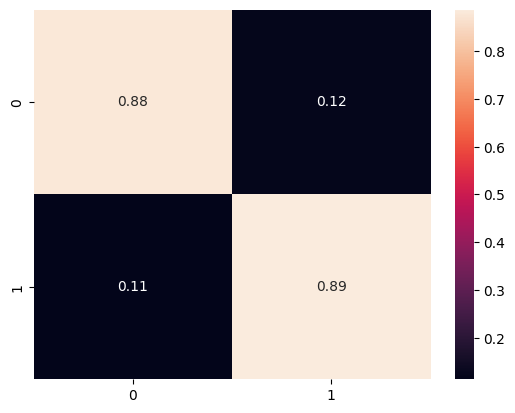

In [19]:
confusion=confusion_matrix(y_test,prediction_test,normalize='true')
sns.heatmap(confusion,annot=True)

ROC Curve

In [20]:
y_proba = lg.predict_proba(combined_df_test)[:, 1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_proba)


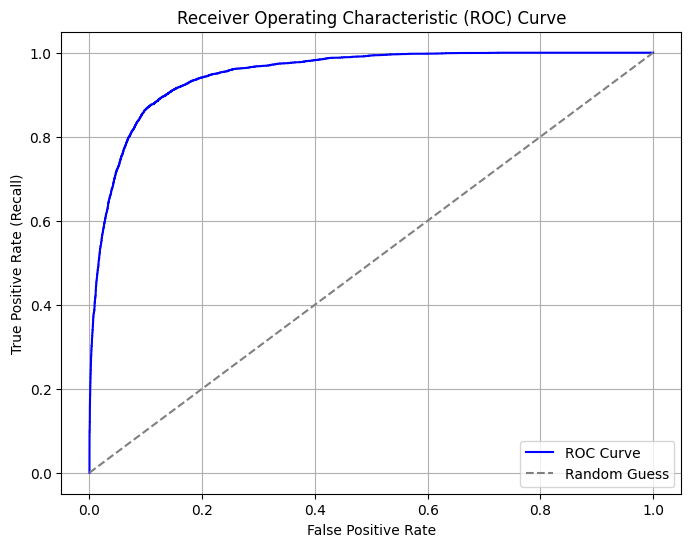

ROC-AUC Score: 0.9500


In [21]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")
